In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

%matplotlib inline

from new_thesis_library import *

In [2]:
ISINs = bonds_payments.ISIN.unique()

# Determining maturities

In [3]:
bonds_start_end = {}

for ISIN in ISINs:
    bonds_start_end[ISIN] = [bonds_payments[bonds_payments.ISIN == ISIN].iloc[0]['Дата фактической выплаты']]
    bonds_start_end[ISIN].append(bonds_payments[bonds_payments.ISIN == ISIN].iloc[-1]['Дата фактической выплаты'])

In [4]:
term_to_maturity_grid = {}
deals_colors = {}
dates_list = dates.to_list()

for ISIN in ISINs:
    valid_dates = pd.DatetimeIndex([date if (date > bonds_start_end[ISIN][0]) and 
                                    (date < bonds_start_end[ISIN][1]) else None for date in dates_list])
    term_to_maturity_grid[ISIN] = (bonds_start_end[ISIN][1] - valid_dates).days/365
    
    #an attemtp to mark days when trades happen
    deal_color = np.array((bonds_prices[ISIN].notna() * 1)) * 0.5
    deals_colors[ISIN] = deal_color

In [5]:
term_to_maturity_df = pd.DataFrame(term_to_maturity_grid, index = dates)

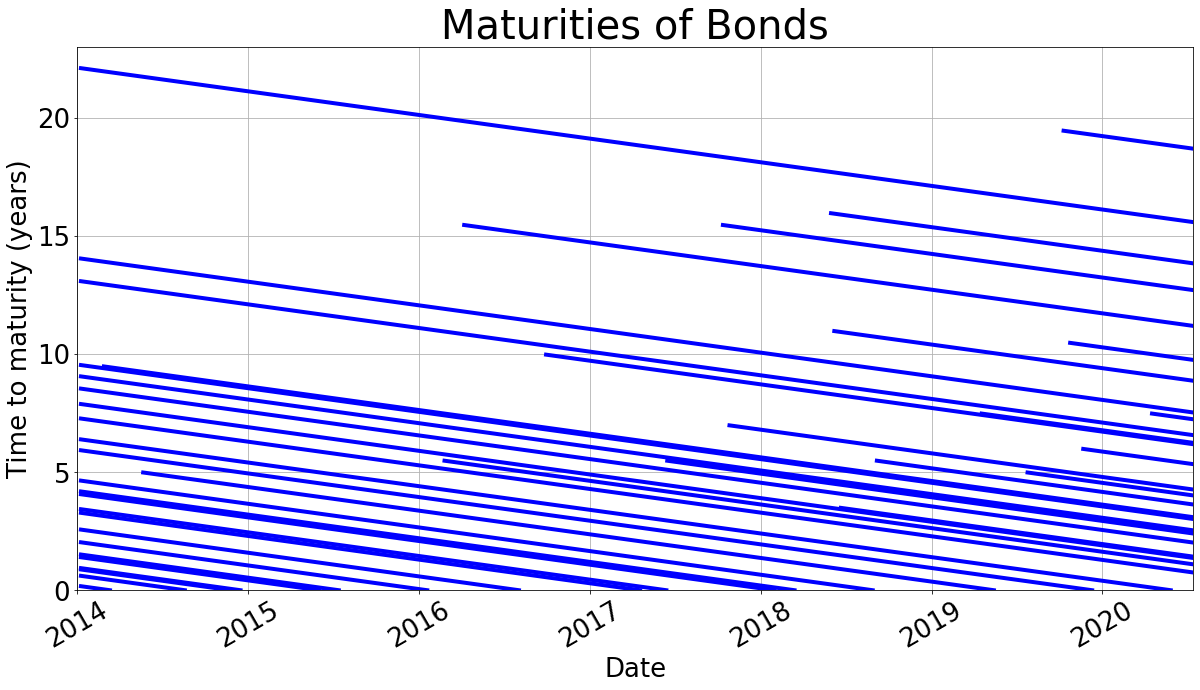

In [6]:
plt.figure(figsize = (20, 10))
plt.title('Maturities of Bonds', fontsize = 40)
plt.xlabel('Date', fontsize = 26)
plt.ylabel('Time to maturity (years)', fontsize = 26)
plt.tick_params(axis='x', which='major', labelsize=26, labelrotation = 30)
plt.tick_params(axis='y', which='major', labelsize=26)
plt.xlim([dates[0] - dt.timedelta(days = 8), dates[-1]])
plt.ylim([0, 23])
plt.grid(True)

for ISIN in ISINs: 
    plt.plot(term_to_maturity_df[ISIN], linewidth=4, color = 'b')
    
plt.savefig('Pictures/Bonds.png');

In [7]:
term_to_maturity_array = term_to_maturity_df.values
deals_colors_array = pd.DataFrame(deals_colors).values

In [12]:
term_to_maturity_df.mean(axis = 1).mean()

6.00870341987515

In [8]:
import matplotlib.lines as mlines

In [9]:
term_to_maturity_df = pd.DataFrame(term_to_maturity_grid, index = dates)
deals_colors_df = pd.DataFrame(deals_colors, index = dates)

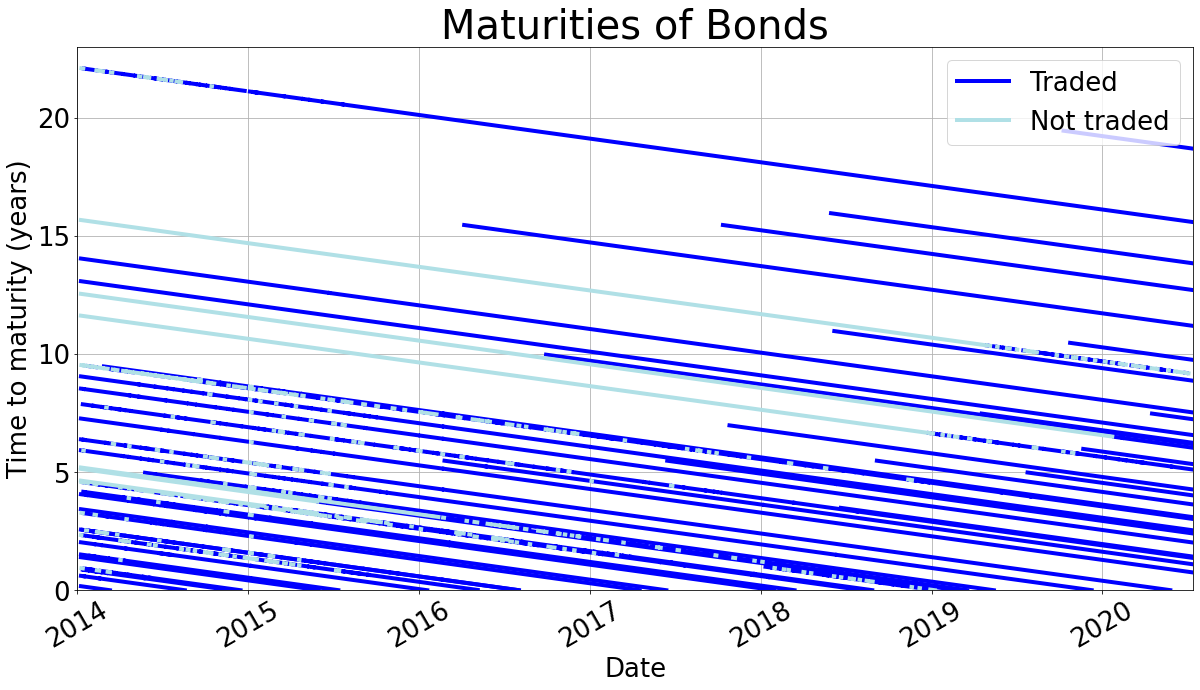

In [297]:
plt.figure(figsize = (20, 10))
plt.title('Maturities of Bonds', fontsize = 40)
plt.xlabel('Date', fontsize = 26)
plt.ylabel('Time to maturity (years)', fontsize = 26)
plt.tick_params(axis='x', which='major', labelsize=26, labelrotation = 30)
plt.tick_params(axis='y', which='major', labelsize=26)
plt.xlim([dates[0] - dt.timedelta(days = 8), dates[-1]])
plt.ylim([0, 23])
plt.grid(True)

plt.plot(deals_bonds, linewidth=4, color = 'b')
plt.plot(no_deals_bonds, linewidth=4, color = 'powderblue')

plt.legend(handles=[mlines.Line2D([], [], color='blue', linewidth=4, label='Traded'), 
                    mlines.Line2D([], [], color='powderblue', linewidth=4, label='Not traded')],
           fontsize = 26)

plt.savefig('Pictures/Bonds.png');

In [98]:
deals_bonds = term_to_maturity_df[deals_colors_df == 0.5]
no_deals_bonds = term_to_maturity_df[deals_colors_df == 0]

In [289]:
def split_into_lines(ts, c):
    all_lines = []
    
    line = {}
    line['x'] = []
    line['y'] = []
    line['color'] = c
    line['ISIN'] = ts.name
    last_x, last_y = 0, 0
    last_value_nan = True
    
    for i in range(len(ts)):
        x = ts.index[i]
        y = ts[i]

        current_value_nan = np.isnan(y)
#        print('i =', i, 'x =', x, 'y =', y, 'last_x =', last_x, 'last_y', last_y)
        
        if last_value_nan and not current_value_nan:
            line['x'].append(x)
            line['y'].append(y)
            last_value_nan = False
#            print(1, line)
            
            
        elif not last_value_nan and not current_value_nan:
            a = 1
#            print(2, line)
            
        elif not last_value_nan and current_value_nan:
            last_value_nan = True
            if last_y != line['y'][-1]:
                line['x'].append(last_x)
                line['y'].append(last_y)
            all_lines.append(line)    
#            print(3, line)
            
            line = {}
            line['x'] = []
            line['y'] = []
            line['color'] = c
            line['ISIN'] = ts.name
            
        if last_value_nan == False and i == len(ts) - 1:
            line['x'].append(x)
            line['y'].append(y)
#            print(4, line)
            all_lines.append(line)
            
        last_x = x
        last_y = y
    return all_lines

In [290]:
all_lines = []

for ISIN in ISINs:
    all_lines += split_into_lines(deals_bonds[ISIN], 'b')
    
for ISIN in ISINs:
    all_lines += split_into_lines(no_deals_bonds[ISIN], 'powderblue')

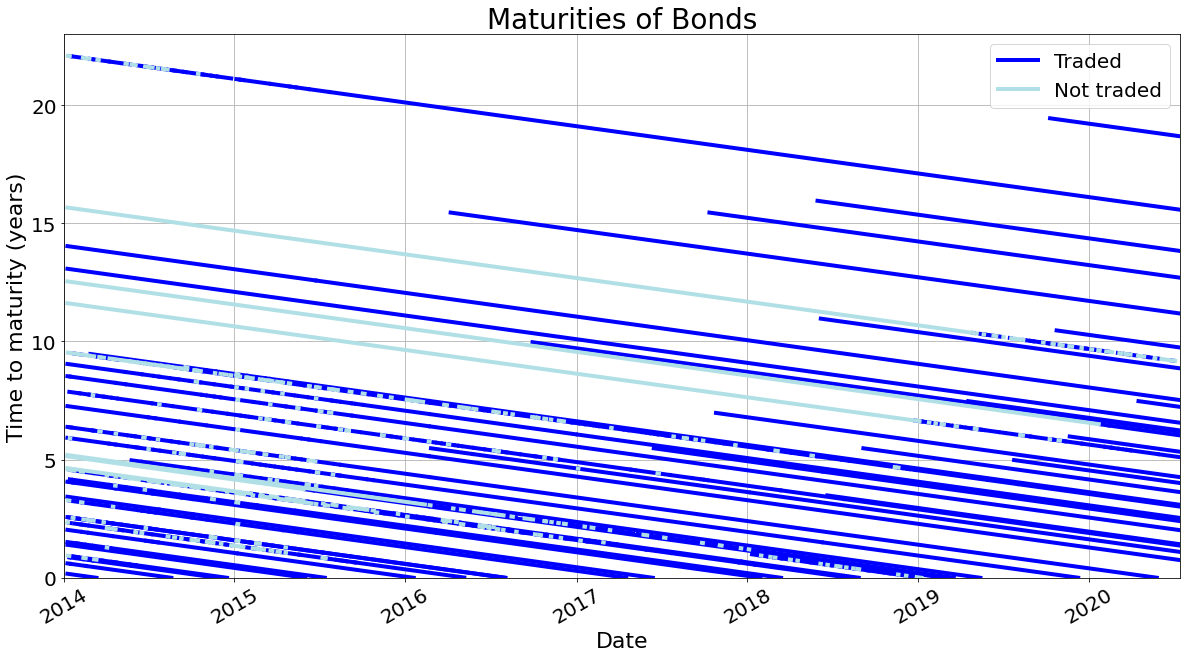

In [294]:
figure, axes = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))

axes.set_title('Maturities of Bonds', fontsize = 28)
axes.set_xlabel('Date', fontsize = 22)
axes.set_ylabel('Time to maturity (years)', fontsize = 22)
axes.tick_params(axis='x', which='major', labelsize=20, labelrotation = 30)
axes.tick_params(axis='y', which='major', labelsize=20)
axes.set_xlim([dates[0] - dt.timedelta(days = 8), dates[-1]])
axes.set_ylim([0, 23])
axes.grid(True)

for line in all_lines:
    axes.plot(line['x'], line['y'], linewidth=4, color = line['color'])


axes.legend(handles=[mlines.Line2D([], [], color='blue', linewidth=4, label='Traded'), 
                    mlines.Line2D([], [], color='powderblue', linewidth=4, label='Not traded')],
           fontsize = 20)

#tikzplotlib.clean_figure()
tikzplotlib.save('Pictures/Bonds.tex');

# Nelson Siegel components visualizaiton

In [2]:
plt.rcParams.update({
    "text.usetex": True})
plt.margins(0)

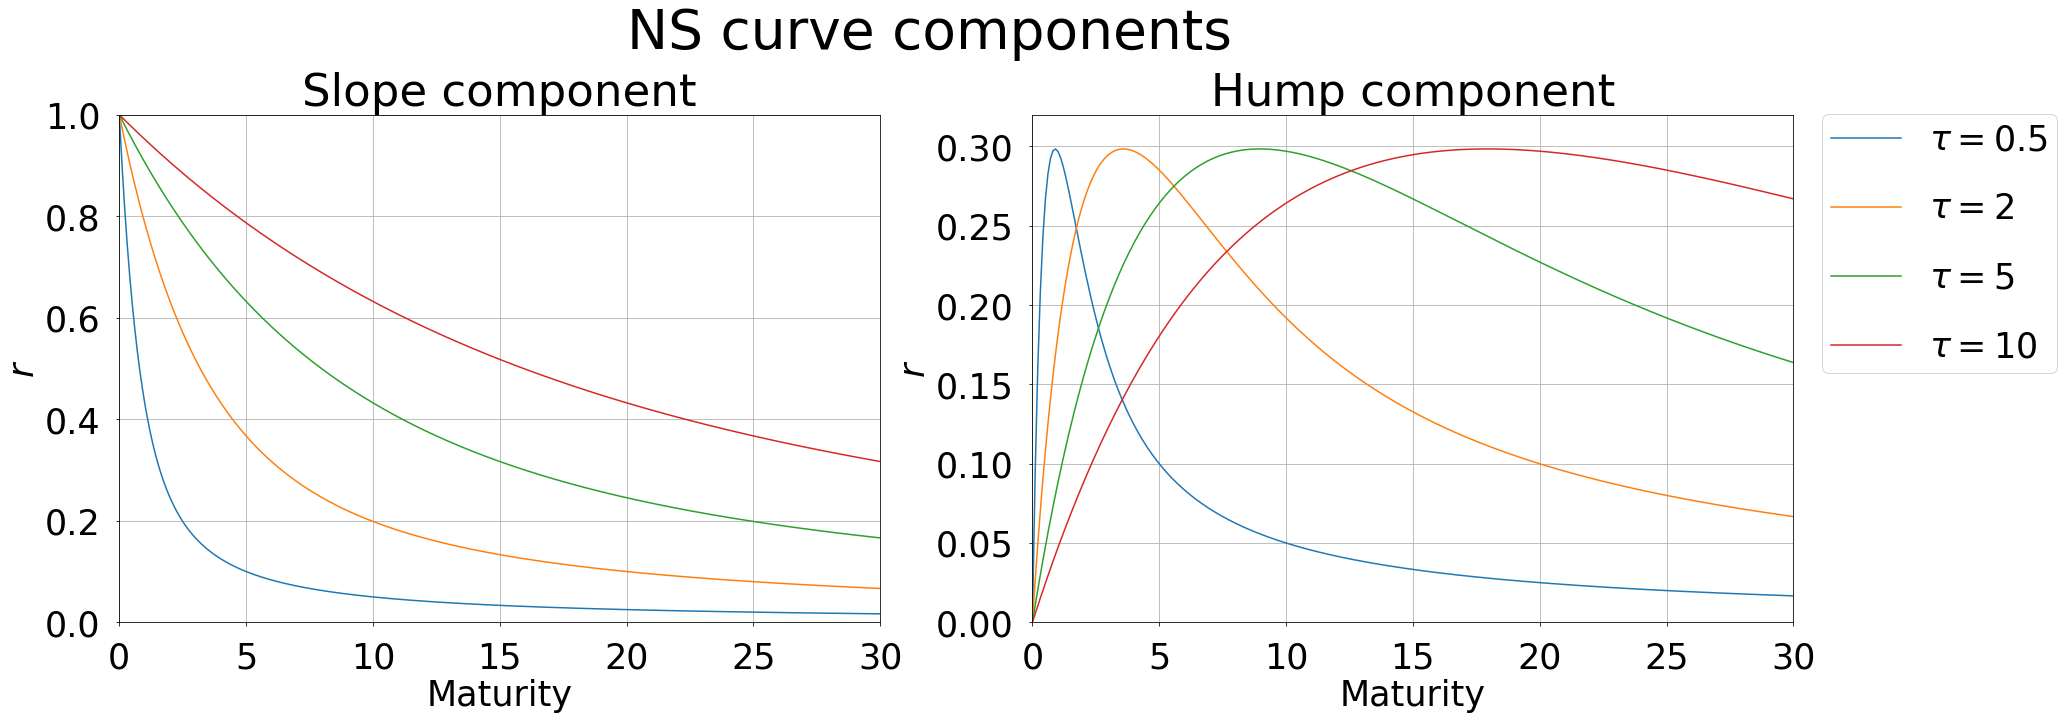

In [320]:
m = np.linspace(0.01, 30, 300)

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(30, 10))
figure.suptitle('NS curve components', fontsize=55);

axes[0].plot(m, g(m, 0.5), label = r'$\tau = 0.5$')
axes[0].plot(m, g(m, 2), label = r'$\tau = 2$')
axes[0].plot(m, g(m, 5), label = r'$\tau = 5$')
axes[0].plot(m, g(m, 10), label = r'$\tau = 10$')
axes[0].set_title('Slope component', size=45)
axes[0].set_xlim([0, 30])
axes[0].set_ylim([0, 1])
axes[0].set_xlabel('Maturity', fontsize = 35)
axes[0].set_ylabel(r'$r$', fontsize = 35)
axes[0].tick_params(axis='both', which='major', labelsize=35, pad=15)
axes[0].grid(True)

axes[1].plot(m, h(m, 0.5))
axes[1].plot(m, h(m, 2))
axes[1].plot(m, h(m, 5))
axes[1].plot(m, h(m, 10))
axes[1].set_title('Hump component', size=45)
axes[1].set_xlim([0, 30])
axes[1].set_ylim([0, 0.32])
axes[1].set_xlabel('Maturity', fontsize = 35)
axes[1].set_ylabel(r'$r$', fontsize = 35)
axes[1].tick_params(axis='both', which='major', labelsize=35, pad=15)
axes[1].grid(True)

handles, labels = axes[0].get_legend_handles_labels()
lgd = figure.legend(handles, labels, fontsize = 35, bbox_to_anchor = (1.03, 0.855), borderpad = 0.25, labelspacing = 1)
figure.subplots_adjust(top=0.83)
#plt.tight_layout()
figure.savefig('Pictures/NSComponents.png', bbox_extra_artists=(lgd,), bbox_inches='tight');

In [ ]:
plt.style.use("ggplot")

t = np.arange(0.0, 2.0, 0.1)
s = np.sin(2 * np.pi * t)
s2 = np.cos(2 * np.pi * t)
plt.plot(t, s, "o-", lw=4.1)
plt.plot(t, s2, "o-", lw=4.1)
plt.xlabel("time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Simple plot $\\frac{\\alpha}{2}$")
plt.grid(True)

import tikzplotlib

tikzplotlib.save("Pictures/.tex")